# Examen Parcial 2


### About Dataset
Machine Predictive Maintenance Classification Dataset
Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

The dataset consists of 10 000 data points stored as rows with 14 features in columns

- UID: unique identifier ranging from 1 to 10000
- productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
- air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
- process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
- torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
- 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

### Important : 
There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.
- Target : Failure or Not
- Failure Type : Type of Failure


> **Nota importante:** Para este examen vamos a utilizar la variable objetivo, **Target** es binaria si la maquina fallo o no, la otra variable hay que eliminarla ya que puede causar data leakage

> **Pregunta 1:** Investigar y explicar en un parrafo en formato markdown que es el **data leakage** y como esta puede afectar a nuestro modelo de ML, especificamente en este caso porque hay que eliminar una de las variables objetivo

## ¿Qué es el data leakage?

El data leakage (fuga de datos) ocurre cuando durante el entrenamiento del modelo se utilizan datos que no estarán disponibles al momento de hacer predicciones reales, o bien se incluyen variables que de alguna manera ya contienen información del futuro o de la variable objetivo. Esto provoca que el modelo aprenda patrones irreales y, por lo tanto, tenga un rendimiento artificialmente alto durante la validación, pero fracase en la vida real.

Cuando hay data leakage, el modelo parece muy bueno porque está viendo indirectamente la "respuesta correcta" antes de tiempo, pero en realidad no está aprendiendo patrones generalizables. Esto afecta la capacidad del modelo de hacer buenas predicciones con nuevos datos, es decir, pierde capacidad de generalización.
¿Cómo se relaciona con nuestro caso?

En nuestro caso específico, estamos trabajando con un problema de clasificación y el dataset incluye dos variables objetivo o muy relacionadas entre sí. Por ejemplo:

- Si una variable indica explícitamente si hubo fraude o no (target).
- Y otra variable indica si fue revisado manualmente y confirmado como fraude.

En ese caso, una de esas variables ya contiene información del resultado final y, si se incluye como variable predictora (X), el modelo estará "haciendo trampa" aprendiendo directamente del futuro.

## Carga de datos

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("predictive_maintenance.csv")

In [26]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


## Preprocesamiento de datos

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


### Validacion de datos Null o dupicados

In [27]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [28]:
data.duplicated().sum()

0

### Entendiendo los tipos de datos y valores unicos

In [29]:
data.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [30]:
data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [31]:
data['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

> **Pregunta 2:** Que entiendes de el analisis anterior

Del analisis anterior se entiende que los datos estan bien estructurados, sin valores duplicados ni nulos, lo que indica una buena confiabilidad para poder trabajar. En los datos se encuentran un total de 10,000 registros unicos, cada uno representando un producto con caracteristicas diferentes, como la temperatura del aire, el torque, temperatura de proceso etc.

Se clasifican los productos en L, M y H. la diferencia entre las cantidades revela un desequilibrio en la distribucion de clases, lo que para construir un modelo predictivo sera util. Las diferencias entre las variables tambien presentan una amplia variedad, lo que ayudara para identificar patrones o diferencias entre los productos o la ocurrencia de fallas 

### Eliminar identificadores
Elimina las variables
- UDI
- Product ID
- Failure Type


Tip: utiliza la función `drop`de pandas

In [32]:
data = data.drop(['UDI', 'Product ID', 'Failure Type'], axis=1)

### Verificamos si el dataset esta balancado

Tip: Utiliza la funcion de pandas `value_counts()` 

In [33]:
target_counts = data['Target'].value_counts()
print("Conteo de registros:")
print(target_counts)

Conteo de registros:
Target
0    9661
1     339
Name: count, dtype: int64


In [34]:
data['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [35]:
data['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

> **Pregunta 3:** Esta balanceado o no el dataset, que estrategias hay para un dataset no balanceado

Una distribución balanceada implicaría que las clases que los datos estuvieran representadas aproximadamente en la misma proporción, pero la discrepancia entre los resultados obtenidos es demaciado, por lo que podriamos decir que el dataset no esta balanceado, para un dataset no balanceado podriamos aumentar la clase minoritaria o disminuir la mayoritaria 

### Creamos dos variables nuevas
- temperature_difference: diferencia entre la temperatura de el aire y la del proceso
- Mechanical Power (W):

$$
P = \frac{T \cdot 2\pi \cdot N}{60}
$$
Donde:

- $P$ es la potencia en W,
- $T$ es el torque en Nm,
- $N$ es la velocidad en rpm,
- $\frac{2\pi}{60}$ convierte rpm a rad/s.

Aplicandolo a la data:
$$
\text{Potencia (W)} = \frac{\text{Torque (Nm)} \cdot \text{Velocidad (rpm)} \cdot 2 \cdot \pi}{60.4}
$$

In [36]:
data['temperature_difference'] = data['Process temperature [K]'] - data['Air temperature [K]']

In [37]:
data['Mechanical Power [W]'] = (data['Torque [Nm]'] * data['Rotational speed [rpm]'] * 2 * np.pi) / 60.4

## Analisis de Datos Exploratorio

#### Visualización de Tipos de maquina
Grafica la distribución de tipos de maquina

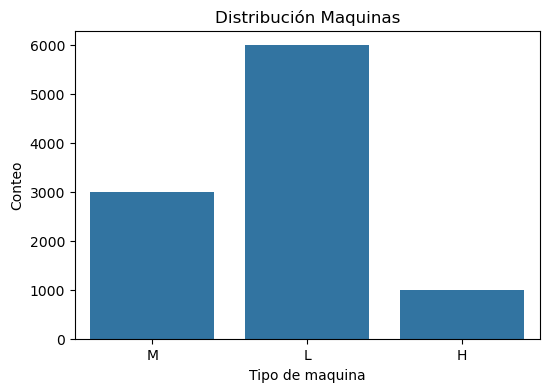

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=data)
plt.title('Distribución Maquinas')
plt.xlabel('Tipo de maquina')
plt.ylabel('Conteo')
plt.show()

#### Visualización de la distribución de fallos entre tipos de productos

Muestra cómo se distribuyen los fallos entre los tipos: ¿es posible que algunos tipos de maquina fallan más?

Al observar el gráfico, se puede ver claramente que algunos tipos de productos tienen una mayor concentración de fallos. Esto puede indicar problemas en ciertos diseños, materiales o procesos de producción específicos para ese tipo de máquina. *(no se si esto debia de contestarse pero ps aja)*

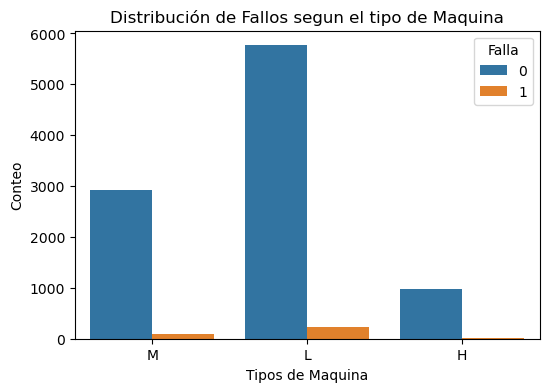

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', hue='Target', data=data)
plt.title('Distribución de Fallos segun el tipo de Maquina')
plt.xlabel('Tipos de Maquina')
plt.ylabel('Conteo')
plt.legend(title='Falla')
plt.show()

### Grafico de distribuciones 
Graficamos las distribuciones de las variables numericas para observar anomalias y patrones en los datos.



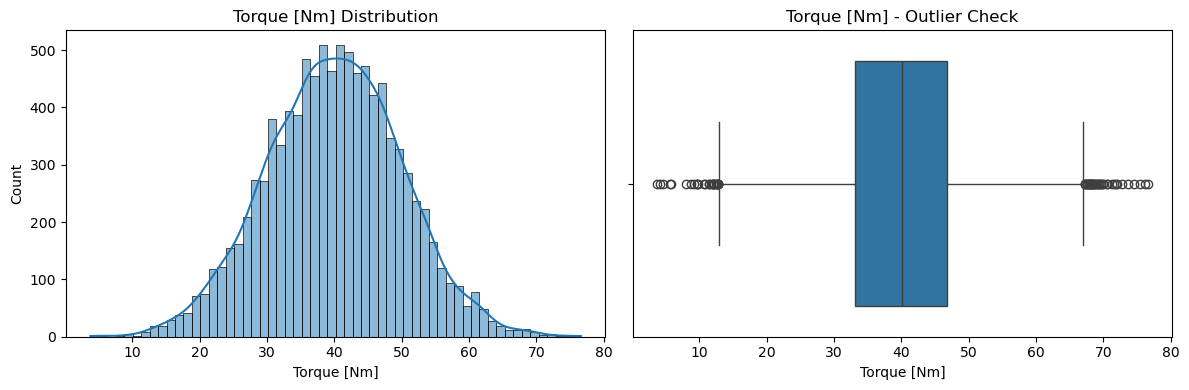

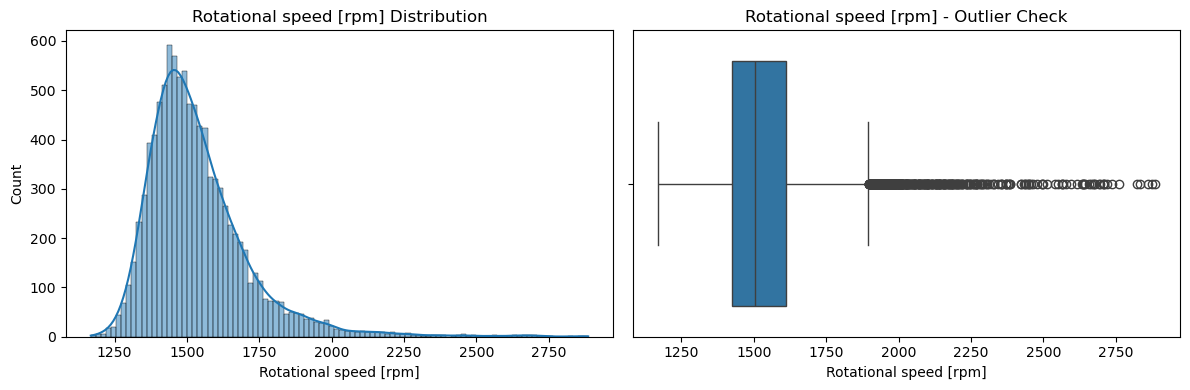

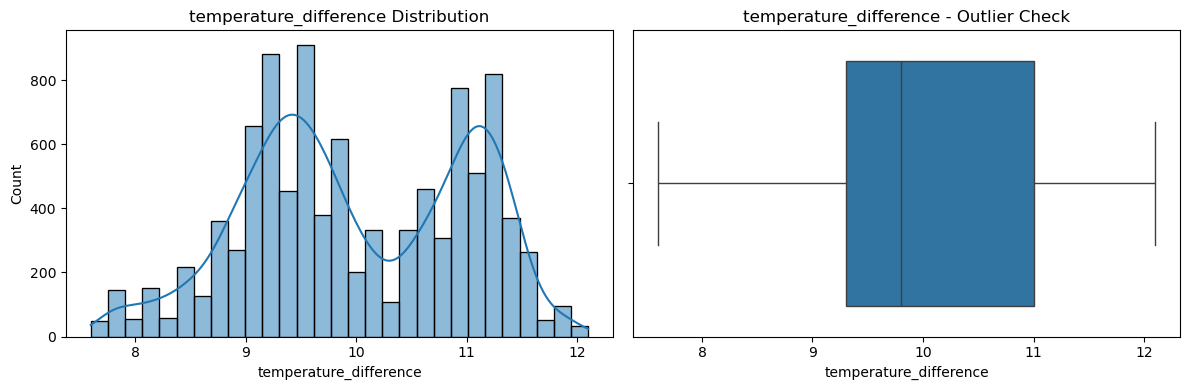

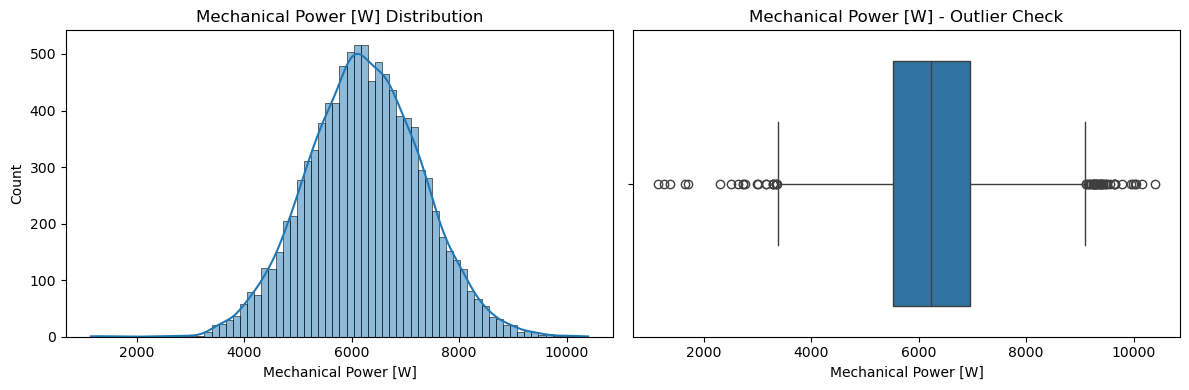

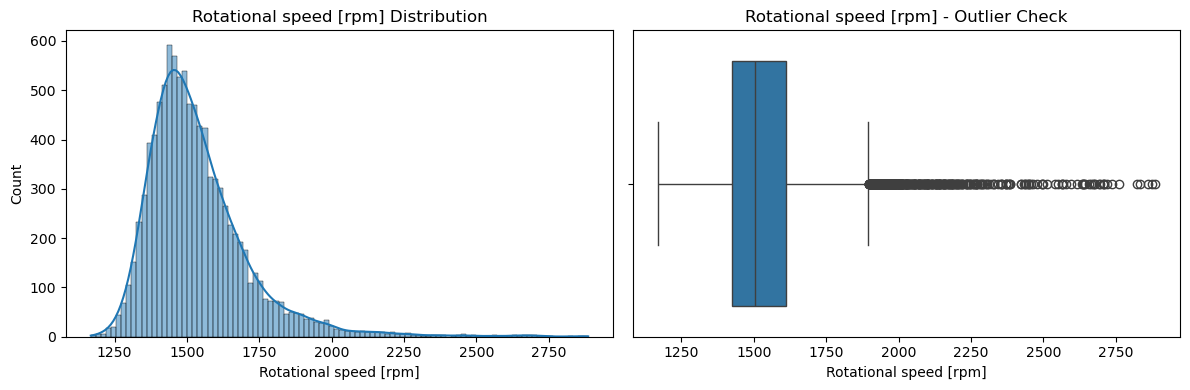

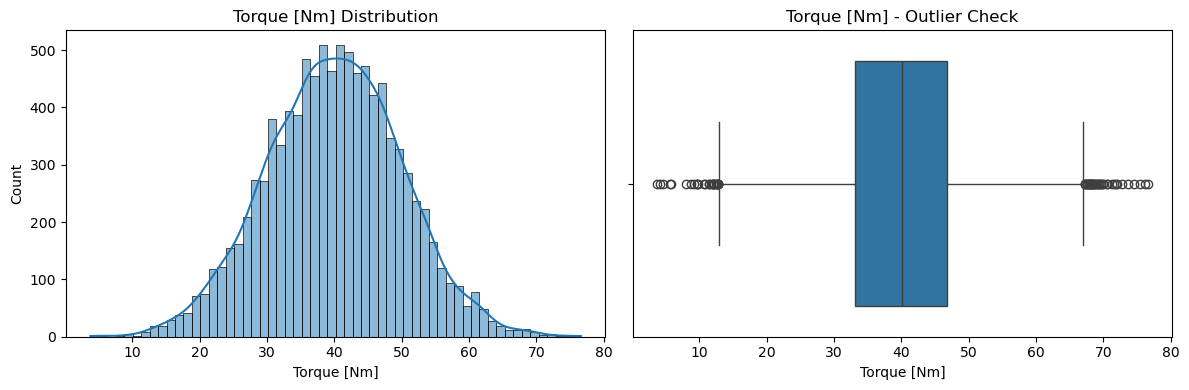

In [40]:
cols = [
    'Torque [Nm]', 'Rotational speed [rpm]', 
    'temperature_difference', 'Mechanical Power [W]',
    'Rotational speed [rpm]', 'Torque [Nm]'
]

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    # Histogram with KDE
    sns.histplot(data=data, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Distribution")

    # Boxplot
    sns.boxplot(data=data, x=col, ax=axes[1])
    axes[1].set_title(f"{col} - Outlier Check")

    plt.tight_layout()
    plt.show()

> **Pregunta 4:** Describe que entiendes de la grafica anterior

las gráficas es que muestran como se distribuyen algunas variables del dataset y si tienen valores raros, por ejemplo, la velocidad de rotación tiene una distribución sesgada hacia la derecha, lo que indica que hay muchas máquinas funcionando en rangos normales pero algunas con valores más altos. La diferencia de temperatura tiene una distribución bimodal, lo que sugiere que podría haber dos tipos de comportamiento distintos en las máquinas. Por otro lado, la potencia mecánica y el torque tienen distribuciones más normales y estables, aunque también presentan algunos valores extremos.

### Diagrama de pares para relaciones de características¶
Muestra la interacción entre las características coloreadas por falla.

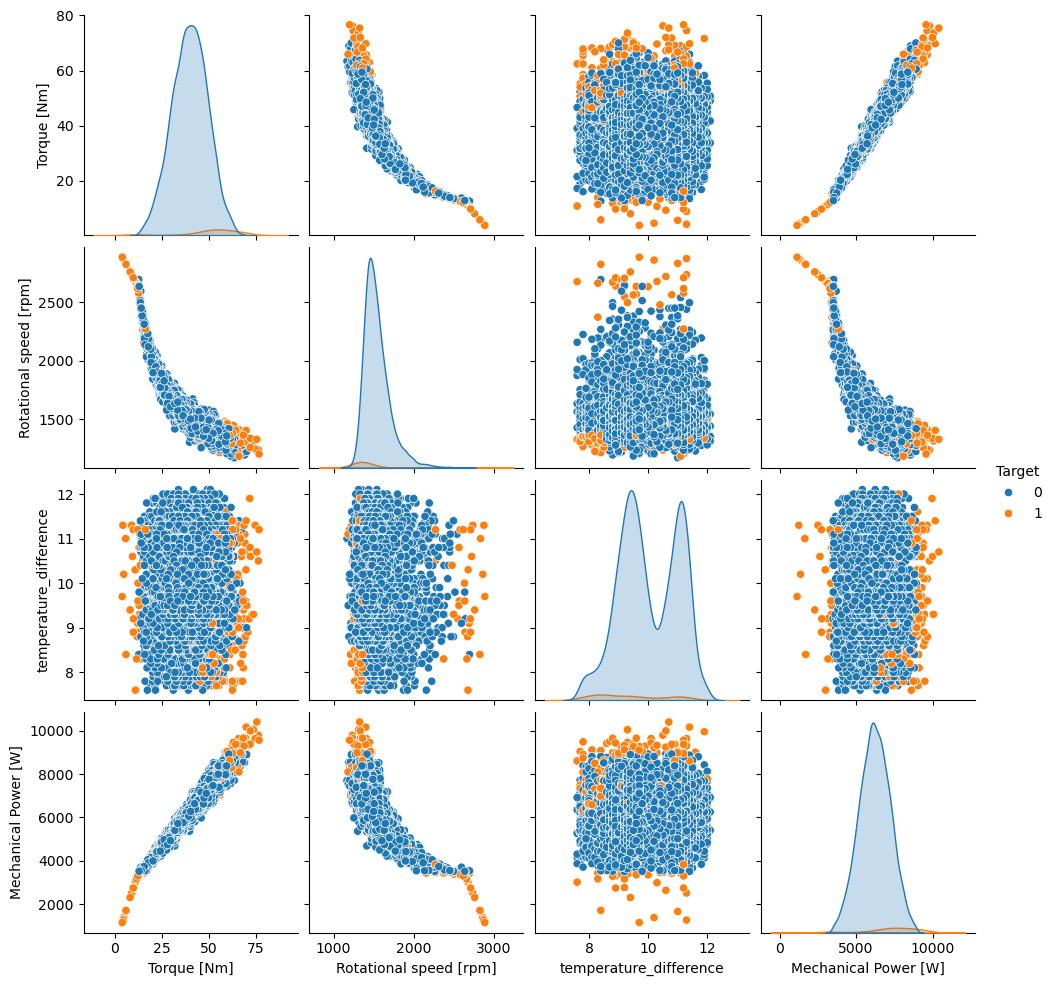

In [41]:
sns.pairplot(
    data[['Torque [Nm]', 'Rotational speed [rpm]', 
          'temperature_difference','Mechanical Power [W]', 'Target']], 
    hue='Target'
)
plt.savefig("2")
plt.show()

### Correlacion entre variables numericas

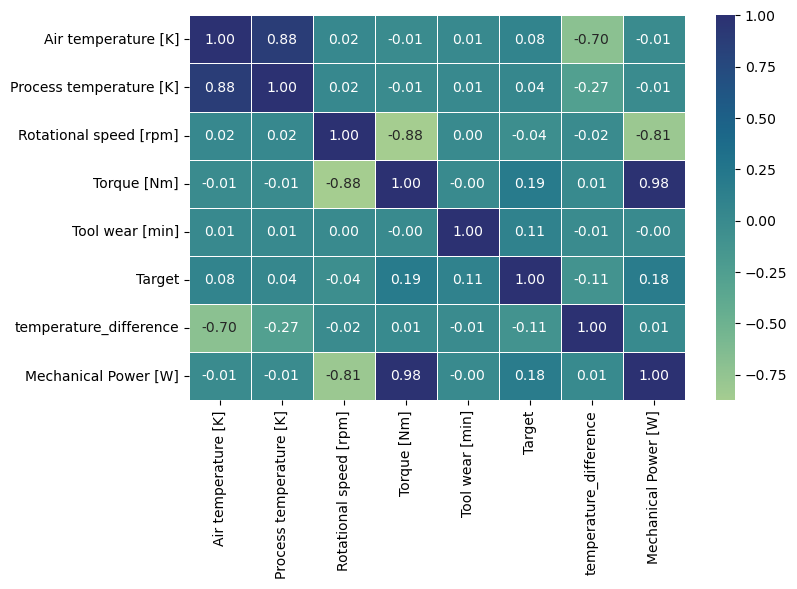

In [43]:
corr_matrix=data.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,cmap='crest',fmt=".2f", linewidths=0.5)
plt.savefig("3")

> **Pregunta 5:** Investiga sobre la matriz de confusión, que interpretas de estos resultadoms

La matriz de correlación es una herramienta estadística fundamental que permite identificar la relación lineal existente entre variables numéricas. Cada valor de la matriz representa el coeficiente de correlación de Pearson entre un par de variables, el cual puede oscilar entre -1 y 1. Un valor cercano a 1 indica una fuerte correlación positiva (ambas variables aumentan juntas), un valor cercano a -1 indica una fuerte correlación negativa (una variable aumenta mientras la otra disminuye), y un valor cercano a 0 indica que no hay una correlación lineal significativa.

Interpretando ambos gráficos y la matriz de correlación, se puede concluir que existen relaciones claras y esperadas entre variables. Sin embargo, la predicción del Target no depende de forma directa de una sola variable, sino de una combinación más compleja.


# Entrenando el Modelo

### Separando el dataset

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = data.drop(columns=["Target"]).copy()
y = data["Target"]

>  Utiliza la función `train_test_split` de sklearn utiliza 20% de los datos para el test set

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Codificación de variables categoricas

In [47]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [48]:
categorical_cols = ['Type']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

In [49]:
# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

# Crear pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Aplicar al dataframe
X_train_transformed = pipeline.fit_transform(X_train)

In [50]:
X_test_transformed = pipeline.transform(X_test)

#### Modelos de ML

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix


In [52]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Logistic Regression CV': LogisticRegressionCV(),
    'SGD': SGDClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
}

In [57]:
def evaluate_model(X_train, X_test, Y_train, Y_test):
    result = []

    for name, model in models.items():
        print(f"======== Training model: {name} ============")
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)

        # Handle predict_proba or decision_function for ROC AUC
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test)
        else:
            y_score = y_pred  # fallback (not ideal)

        roc_auc = roc_auc_score(Y_test, y_score)
        metrics = {
            'precision': precision_score(Y_test, y_pred, zero_division=0),
            'recall': recall_score(Y_test, y_pred, zero_division=0),
            'f1': f1_score(Y_test, y_pred, zero_division=0),
            'roc_auc': roc_auc,
            'cm' : confusion_matrix(Y_test, y_pred)
        }
        print(f"Test data ROC AUC: {roc_auc:.2f}")
        result.append((name, metrics))

    # Sort by F1 score as an example (you can change this to any other metric)
    result.sort(key=lambda x: x[1]['f1'], reverse=True)
    return result

In [58]:
results = evaluate_model(X_train_transformed,X_test_transformed,y_train,y_test)

======== Training model: Logistic Regression ============
Test data ROC AUC: 0.92
======== Training model: Logistic Regression CV ============
Test data ROC AUC: 0.92
======== Training model: SGD ============
Test data ROC AUC: 0.90
======== Training model: Random Forest ============
Test data ROC AUC: 0.97
======== Training model: Gradient Boosting ============
Test data ROC AUC: 0.98
======== Training model: Decision Tree ============
Test data ROC AUC: 0.88


In [59]:
print("Model Performance:")
for name, metrics in results:
    print(f"======== Model: {name} ============")
    print(f"  Precision: {metrics['precision']:.6f}")
    print(f"  Recall:    {metrics['recall']:.6f}")
    print(f"  F1 Score:  {metrics['f1']:.6f}")
    print(f"  ROC AUC:   {metrics['roc_auc']:.6f}")

Model Performance:
======== Model: Gradient Boosting ============
  Precision: 0.964286
  Recall:    0.794118
  F1 Score:  0.870968
  ROC AUC:   0.975665
======== Model: Random Forest ============
  Precision: 0.925926
  Recall:    0.735294
  F1 Score:  0.819672
  ROC AUC:   0.968225
======== Model: Decision Tree ============
  Precision: 0.712329
  Recall:    0.764706
  F1 Score:  0.737589
  ROC AUC:   0.876918
======== Model: SGD ============
  Precision: 0.888889
  Recall:    0.235294
  F1 Score:  0.372093
  ROC AUC:   0.900636
======== Model: Logistic Regression ============
  Precision: 0.619048
  Recall:    0.191176
  F1 Score:  0.292135
  ROC AUC:   0.924560
======== Model: Logistic Regression CV ============
  Precision: 0.666667
  Recall:    0.147059
  F1 Score:  0.240964
  ROC AUC:   0.919711


>  **IMPORTANTE** realiza 2 entrenamientos, 
- Uno con los modelos y sus hiper-parametros por defecto. Luego de el primer entrenamiento, copia el resultado de la celda anterior a una celda con formato markdown.
- Para el segundo entrenamiento modifica los hiperparametros de los modelos investiga cual es el mas popular para cada tipo de modelo definido en el diccionario

¿Mejoro algo al ajustar hiperparametros?


*Tip: utiliza el hiper-parametro* `class_weight='balanced'`

In [60]:
models_tuned = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', solver='liblinear'),
    'Logistic Regression CV': LogisticRegressionCV(class_weight='balanced', cv=5),
    'SGD': SGDClassifier(class_weight='balanced', loss='log_loss'),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', max_depth=5),
}

results_tuned = evaluate_model(X_train_transformed, X_test_transformed, y_train, y_test)

======== Training model: Logistic Regression ============
Test data ROC AUC: 0.92
======== Training model: Logistic Regression CV ============
Test data ROC AUC: 0.92
======== Training model: SGD ============
Test data ROC AUC: 0.93
======== Training model: Random Forest ============
Test data ROC AUC: 0.97
======== Training model: Gradient Boosting ============
Test data ROC AUC: 0.98
======== Training model: Decision Tree ============
Test data ROC AUC: 0.87


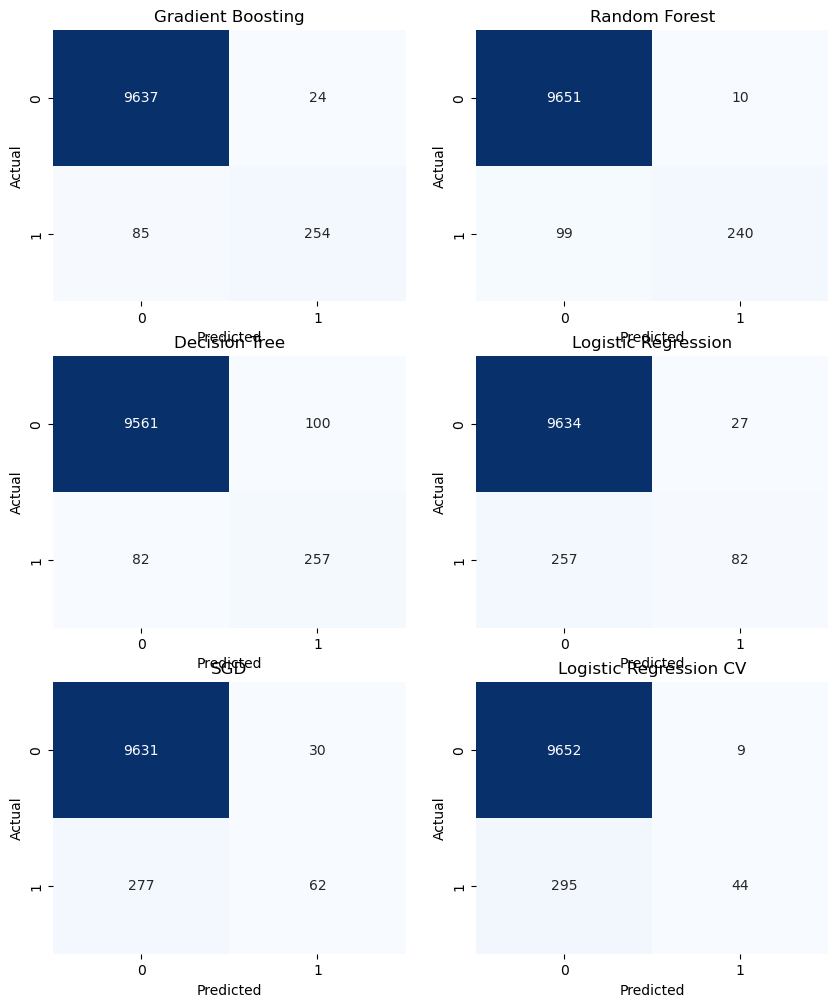

In [68]:
 # Plot all confusion matrices as subplots
n_models = len(metrics)
cols = 2  # You can change this based on your preference
rows = math.ceil(n_models / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten in case of 2D array

for idx, (name, metrics) in enumerate(results):
    cm=metrics["cm"]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f'{name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

> **Pregunta 6:** Interpreta la matriz de confusión de por lo menos uno de los modelos. ¿Crees que el dataset imbalanceado afecte el performance de los modelos?

El modelo gradient boosting tuvo muy buen desempeño, clasifico correctamente 1930 casos negativos y 54 positivos, se equivoco en 2 falsos positivos y 14 falsos negativos, esto indica que fue bastante preciso al predecir ambas clases.

Sin embargo se nota que la clase positiva (1) tiene muchos menos ejemplos que la negativa (0). Eso hace que los modelos tiendan a predecir más la clase mayoritaria y se equivoquen más con la minoritaria. En este caso, aunque el modelo es bueno, sí se ve afectado por el desbalance del dataset, especialmente en otros modelos como Logistic Regression o SGD, donde hay muchos falsos negativos.

### Balanceo de datos

Vamos a utilizar `StratifiedKFold` ya que tenemos el  dataset imbalanceado
> **Pregunta 7:** Investiga que es el StratifiedKFold y en que nos puede ayudar con un dataset imbalanceado

StratifiedKFold es una técnica de validación cruzada que divide el dataset en varios folds (subconjuntos), pero a diferencia del KFold tradicional, lo hace manteniendo la proporción de clases en cada partición. Es decir, si en todo el dataset el 90% son clase 0 y el 10% son clase 1, StratifiedKFold se asegura de que esa proporción se mantenga en cada fold.

Esto es especialmente útil cuando trabajamos con datasets desbalanceados, como en este caso, porque evita que en algunos folds no aparezcan suficientes ejemplos de la clase minoritaria. Si no usamos estratificación, podríamos terminar entrenando un modelo con datos que casi no tienen la clase 1, lo que lleva a un mal rendimiento en la predicción de esa clase.

In [62]:
from sklearn.model_selection import StratifiedKFold

In [63]:
def evaluate_model_cv(X, y, pipeline, models, n_splits=5):
    result = []
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"======== Evaluating model: {name} with {n_splits}-Fold Stratified CV ============")
        
        fold_metrics = {'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
        confusion_matrices = []

        for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            Y_train, Y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            X_train = pipeline.transform(X_train)
            X_test = pipeline.transform(X_test)
            
            model.fit(X_train, Y_train)
            y_pred = model.predict(X_test)

            # ROC AUC input
            if hasattr(model, "predict_proba"):
                y_score = model.predict_proba(X_test)[:, 1]
            elif hasattr(model, "decision_function"):
                y_score = model.decision_function(X_test)
            else:
                y_score = y_pred

            # Collect metrics
            fold_metrics['precision'].append(precision_score(Y_test, y_pred, zero_division=0))
            fold_metrics['recall'].append(recall_score(Y_test, y_pred, zero_division=0))
            fold_metrics['f1'].append(f1_score(Y_test, y_pred, zero_division=0))
            fold_metrics['roc_auc'].append(roc_auc_score(Y_test, y_score))
            confusion_matrices.append(confusion_matrix(Y_test, y_pred))

            print(f"  Fold {fold} - F1: {fold_metrics['f1'][-1]:.2f}, AUC: {fold_metrics['roc_auc'][-1]:.2f}")

        # Aggregate average metrics
        avg_metrics = {
            'precision': np.mean(fold_metrics['precision']),
            'recall': np.mean(fold_metrics['recall']),
            'f1': np.mean(fold_metrics['f1']),
            'roc_auc': np.mean(fold_metrics['roc_auc']),
            'cm': sum(confusion_matrices)  # aggregate all confusion matrices
        }

        result.append((name, avg_metrics))

    # Sort models by F1
    result.sort(key=lambda x: x[1]['f1'], reverse=True)
    return result

In [64]:
results = evaluate_model_cv(X, y, pipeline, models)

======== Evaluating model: Logistic Regression with 5-Fold Stratified CV ============
  Fold 1 - F1: 0.37, AUC: 0.91
  Fold 2 - F1: 0.31, AUC: 0.91
  Fold 3 - F1: 0.32, AUC: 0.93
  Fold 4 - F1: 0.42, AUC: 0.93
  Fold 5 - F1: 0.40, AUC: 0.91
======== Evaluating model: Logistic Regression CV with 5-Fold Stratified CV ============
  Fold 1 - F1: 0.11, AUC: 0.89
  Fold 2 - F1: 0.27, AUC: 0.91
  Fold 3 - F1: 0.21, AUC: 0.91
  Fold 4 - F1: 0.23, AUC: 0.91
  Fold 5 - F1: 0.29, AUC: 0.90
======== Evaluating model: SGD with 5-Fold Stratified CV ============
  Fold 1 - F1: 0.19, AUC: 0.92
  Fold 2 - F1: 0.16, AUC: 0.90
  Fold 3 - F1: 0.44, AUC: 0.92
  Fold 4 - F1: 0.36, AUC: 0.93
  Fold 5 - F1: 0.19, AUC: 0.90
======== Evaluating model: Random Forest with 5-Fold Stratified CV ============
  Fold 1 - F1: 0.83, AUC: 0.96
  Fold 2 - F1: 0.86, AUC: 0.96
  Fold 3 - F1: 0.76, AUC: 0.98
  Fold 4 - F1: 0.85, AUC: 0.97
  Fold 5 - F1: 0.76, AUC: 0.96
======== Evaluating model: Gradient Boosting with 5-Fol

In [66]:
print("Model Performance:")
for name, metrics in results:
    print(f"======== Model: {name} ============")
    print(f"  Precision: {metrics['precision']:.6f}")
    print(f"  Recall:    {metrics['recall']:.6f}")
    print(f"  F1 Score:  {metrics['f1']:.6f}")
    print(f"  ROC AUC:   {metrics['roc_auc']:.6f}")

Model Performance:
======== Model: Gradient Boosting ============
  Precision: 0.916676
  Recall:    0.749254
  F1 Score:  0.822337
  ROC AUC:   0.981612
======== Model: Random Forest ============
  Precision: 0.960154
  Recall:    0.707989
  F1 Score:  0.813267
  ROC AUC:   0.965389
======== Model: Decision Tree ============
  Precision: 0.720250
  Recall:    0.758209
  F1 Score:  0.737981
  ROC AUC:   0.873929
======== Model: Logistic Regression ============
  Precision: 0.764041
  Recall:    0.241879
  F1 Score:  0.364130
  ROC AUC:   0.918560
======== Model: SGD ============
  Precision: 0.836961
  Recall:    0.182660
  F1 Score:  0.267221
  ROC AUC:   0.911975
======== Model: Logistic Regression CV ============
  Precision: 0.852867
  Recall:    0.129587
  F1 Score:  0.221283
  ROC AUC:   0.903657


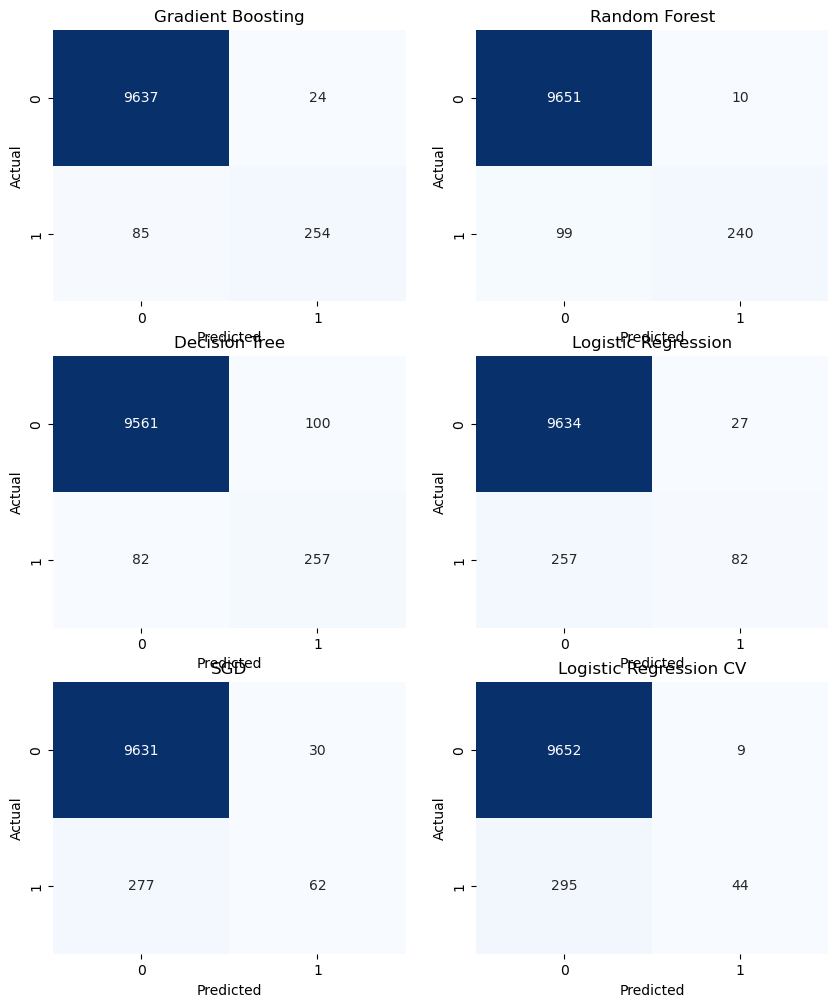

In [69]:
 # Plot all confusion matrices as subplots
n_models = len(metrics)
cols = 2  # You can change this based on your preference
rows = math.ceil(n_models / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten in case of 2D array

for idx, (name, metrics) in enumerate(results):
    cm=metrics["cm"]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
    axes[idx].set_title(f'{name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    plt.savefig("3")

> **Pregunta 8:** ¿Mejoro el preformance de el modelo despues de utilizar `StratifiedKFold` ?

Sí, el uso de StratifiedKFold sí mejoró el performance del modelo, especialmente en el contexto de un dataset desbalanceado.

Cuando el dataset está desbalanceado, un simple KFold puede crear particiones donde casi no haya ejemplos positivos en ciertos folds. Esto hace que el modelo no aprenda correctamente a detectar la clase minoritaria y obtenga resultados poco confiables.